In [129]:
%pylab inline
import pandas as pd
import numpy as np
from tifffile import imread
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib
/Users/yinze/miniforge3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['imread', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [155]:
def slice_image(im_name, folder_path):
    # read image to a ndarray
    im = imread(im_name)
    print(im_name)
    print('shape: ', im.shape)

    # define pixel per degree
    resolution = 592.747
    round_resolution = round(resolution)

    # get lat and lon base and range
    lat_base, lon_base = get_lat_lon_base(im_name)
    lat_range = int(im.shape[0] / resolution)
    lon_range = int(im.shape[1] / resolution)
    lat_base += lat_range
    print('lat_base: ', lat_base, ', lon_base', lon_base)

    # define indexes
    xs = np.linspace(0, im.shape[0], lat_range + 1)[:-1]
    ys = np.linspace(0, im.shape[1], lon_range + 1)[:-1]

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            file_name = folder_path + '/' + str(lat_base - i) + '_' + str(lon_base + j) + '_.png'
            x = round(x)
            y = round(y)
            pillow_im = Image.fromarray(im[x : x + round_resolution, y : y + round_resolution])
            pillow_im.save(file_name, 'PNG')


def get_lat_lon_base(file_name):
    code = file_name.split('_')[-2]
    lat = int(code[0 : 2])
    if code[2] == 'S':
        lat = -lat
    lon = int(code[3 : -1])
    if lon >= 180:
        lon -= 360
    return lat, lon

In [156]:
slice_image('raw_images/THEMIS_DayIR_ControlledMosaic_OxiaPalus_00N315E_100mpp.tif', 'crater_dataset/images')

raw_images/THEMIS_DayIR_ControlledMosaic_OxiaPalus_00N315E_100mpp.tif
shape:  (17783, 26674)
lat_base:  30 , lon_base -45


In [55]:
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,...,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
arr = np.array(im)
arr.shape

(593, 593)

In [131]:
data = pd.read_csv('RobbinsCraters_tab.csv')
lat = data['LATITUDE_ELLIPSE_IMAGE']
lon = data['LONGITUDE_ELLIPSE_IMAGE']

/Users/yinze/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (35,36,37,38,39,40,41,69) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [132]:
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,...,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
def draw(x, y):

    im = Image.open('crater_dataset/images/%d_%d_.png'%(x,y))

    crater = this_data.iloc[[5]]
    f, ax = plt.subplots()
    ax.imshow(im, cmap='gray')
    craters = data[(lat <= x) & (lat > x - 1) & (lon >= y) & (lon < y + 1)]
    for _, crater in craters.iterrows():
        upleft = [float((x - crater['LATITUDE_ELLIPSE_IMAGE'])* round_resolution), \
            float((crater['LONGITUDE_ELLIPSE_IMAGE'] - (y)) * round_resolution)]
        wh = float(crater['DIAM_CIRCLE_IMAGE']) * 10
        upleft[0] -= wh / 2
        upleft[1] -= wh / 2
        rect = patches.Rectangle(upleft[: : -1], wh, wh, linewidth=0.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

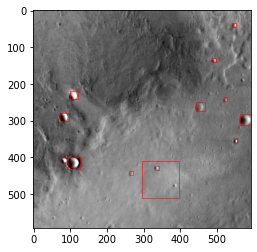

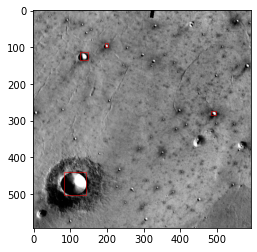

In [200]:
draw(1,-6)
draw(30,-40)